# Part I - (Ford Go Bike Trip data Exploration)
## by (Kommomo Usang)

## Introduction
	
This project will be analyzing and visualizing the data associated with approximately 184,000 individual rides made in a bike-sharing system covering the greater San Francisco Bay area in the month of February 2019. My focus is to ascertain what factors determine the duration of a trip. To tackle this, i will predict and analyse some variables that could possibly influence duration trip. Further questions will be asked and answered in the course of this project. 


## Preliminary Wrangling

This section performs some preliminary wrangling on my dataset to make it more suitable for use.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

### Data Gathering

In [4]:
# load in the dataset into a pandas dataframe, print statistics
biketrip_df = pd.read_csv('201902-fordgobike-tripdata.csv')
biketrip_df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### Data Assessing

In [5]:
biketrip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
biketrip_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
biketrip_df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [9]:
biketrip_df.isna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


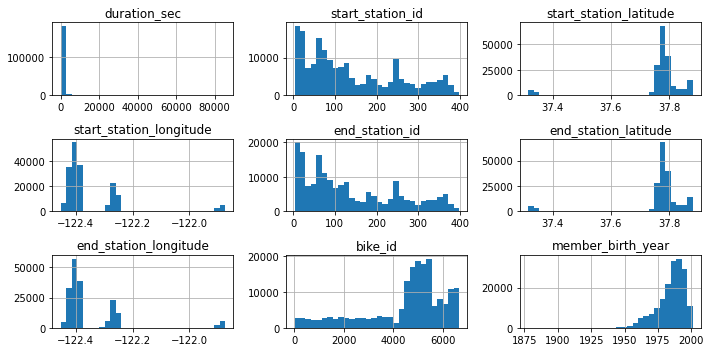

In [10]:
# I plot the distribution of each variable in the dataset to have a general overview of my variables

biketrip_df.hist(bins=30, figsize =(10,5));
plt.tight_layout()

##### Issues with the Data Quality & Tidiness

- Duration is in seconds which may not be easy to comprehend and also have too large values during visualization
- Wrong datatype for start_time, end_time and member_birthyear.
- Start time and start date information in one column
- Long column names
- Extraneous columns not related to my research interest
- Missing values in 6 columns-start-station_id, start_station_name, end_station_id, end_station_name, member_birthyear and   member_gender.

### Data Cleaning

In [11]:
# First save a copy
biketrip_df = biketrip_df.copy()

In [12]:
# Issue1: change duration_sec from format sec to format min and rename as duration
biketrip_df['duration'] = (biketrip_df['duration_sec']/60).astype(int)

In [13]:
# Issue2: Age is a more useful attribute than birthyear so I need to extract age from birthyear but first i will convert birthyear 
# ..to integer since age cannot be float

# convert member birth year to integer since birthyear cannot be float 
biketrip_df.member_birth_year=biketrip_df.member_birth_year.apply(np.round).astype('Int64')

# extract member age from member birth year for easy comprehension
biketrip_df['m_age']=2022-biketrip_df['member_birth_year']

In [15]:
#Issue3: Split time and date information to seperate columns convert start time and end time from string type to datetime type so i can split ..
#..the time and date information to different columns to fix the data tidiness issue

biketrip_df.start_time = pd.to_datetime(biketrip_df.start_time)
biketrip_df.end_time = pd.to_datetime(biketrip_df.end_time)

# extract time(hour of the day) information 
biketrip_df['start_hr'] =biketrip_df['start_time'].apply(lambda x: x.hour)
biketrip_df['end_hr'] =biketrip_df['end_time'].apply(lambda x: x.hour)

#extract date(date and day of the week) information
biketrip_df['start_date']=biketrip_df['start_time'].dt.normalize()
biketrip_df['end_date']=biketrip_df['end_time'].dt.normalize()

biketrip_df['start_weekday']=biketrip_df['start_time'].dt.day_name()
biketrip_df['end_weekday']=biketrip_df['end_time'].dt.day_name()

In [16]:
#Issue4: rename long column names
biketrip_df.rename(columns={'member_gender':'m_gender','start_station_id ':'ssid','end_station_id ':'esid'}, inplace=True)

In [17]:
#Issue5&6: Drop extraneous columns that don't have to do with user information and timing information
# Drop missing values
biketrip_df.drop(['duration_sec','start_time','end_time','start_station_name','start_station_latitude','start_station_longitude',
         'end_station_name','end_station_latitude','end_station_longitude','member_birth_year'],axis =1 , inplace = True)

biketrip_df.dropna(axis=0,inplace=True)


In [18]:
biketrip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_station_id         174952 non-null  float64       
 1   end_station_id           174952 non-null  float64       
 2   bike_id                  174952 non-null  int64         
 3   user_type                174952 non-null  object        
 4   m_gender                 174952 non-null  object        
 5   bike_share_for_all_trip  174952 non-null  object        
 6   duration                 174952 non-null  int32         
 7   m_age                    174952 non-null  Int64         
 8   start_hr                 174952 non-null  int64         
 9   end_hr                   174952 non-null  int64         
 10  start_date               174952 non-null  datetime64[ns]
 11  end_date                 174952 non-null  datetime64[ns]
 12  start_weekday   

In [19]:
biketrip_df.head()

,start_station_id,end_station_id,bike_id,user_type,m_gender,bike_share_for_all_trip,duration,m_age,start_hr,end_hr,start_date,end_date,start_weekday,end_weekday
0,21.0,13.0,4902,Customer,Male,No,869,38,17,8,2019-02-28,2019-03-01,Thursday,Friday
2,86.0,3.0,5905,Customer,Male,No,1030,50,12,5,2019-02-28,2019-03-01,Thursday,Friday
3,375.0,70.0,6638,Subscriber,Other,No,608,33,17,4,2019-02-28,2019-03-01,Thursday,Friday
4,7.0,222.0,4898,Subscriber,Male,Yes,26,48,23,0,2019-02-28,2019-03-01,Thursday,Friday
5,93.0,323.0,5200,Subscriber,Male,No,29,63,23,0,2019-02-28,2019-03-01,Thursday,Friday


In [20]:
#descriptive statistics for numeric variables
biketrip_df.describe()

,start_station_id,end_station_id,bike_id,duration,m_age,start_hr,end_hr
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,139.002126,136.604486,4482.587555,11.241461,37.196865,13.456165,13.609533
std,111.648819,111.335635,1659.195937,27.371269,10.118731,4.734282,4.748029
min,3.000000,3.000000,11.000000,1.000000,21.000000,0.000000,0.000000
25%,47.000000,44.000000,3799.000000,5.000000,30.000000,9.000000,9.000000
50%,104.000000,101.000000,4960.000000,8.000000,35.000000,14.000000,14.000000
75%,239.000000,238.000000,5505.000000,13.000000,42.000000,17.000000,18.000000
max,398.000000,398.000000,6645.000000,1409.000000,144.000000,23.000000,23.000000


In [21]:
# descriptive statistics for categorical variables
biketrip_df.describe(include = ['O'])

,user_type,m_gender,bike_share_for_all_trip,start_weekday,end_weekday
count,174952,174952,174952,174952,174952
unique,2,3,2,7,7
top,Subscriber,Male,No,Thursday,Thursday
freq,158386,130500,157606,33712,33707


In [22]:
biketrip_df.nunique()

start_station_id            329
end_station_id              329
bike_id                    4607
user_type                     2
m_gender                      3
bike_share_for_all_trip       2
duration                    426
m_age                        75
start_hr                     24
end_hr                       24
start_date                   28
end_date                     29
start_weekday                 7
end_weekday                   7
dtype: int64

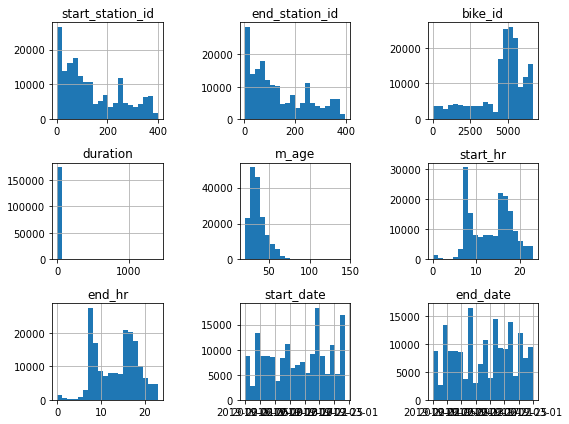

In [23]:
biketrip_df.hist(bins=20, figsize =(8,6));
plt.tight_layout()

### Data Storing
Save cleaned dataset to the csv file 'ford-gobiketrip_master.csv'

In [24]:
biketrip_df.to_csv('ford-gobiketrip_master.csv',encoding='utf-8')

## Exploratory Data Analysis

In [25]:
biketrip = pd.read_csv('ford-gobiketrip_master.csv')
biketrip

,Unnamed: 0,start_station_id,end_station_id,bike_id,user_type,m_gender,bike_share_for_all_trip,duration,m_age,start_hr,end_hr,start_date,end_date,start_weekday,end_weekday
0,0,21.0,13.0,4902,Customer,Male,No,869,38,17,8,2019-02-28,2019-03-01,Thursday,Friday
1,2,86.0,3.0,5905,Customer,Male,No,1030,50,12,5,2019-02-28,2019-03-01,Thursday,Friday
2,3,375.0,70.0,6638,Subscriber,Other,No,608,33,17,4,2019-02-28,2019-03-01,Thursday,Friday
3,4,7.0,222.0,4898,Subscriber,Male,Yes,26,48,23,0,2019-02-28,2019-03-01,Thursday,Friday
4,5,93.0,323.0,5200,Subscriber,Male,No,29,63,23,0,2019-02-28,2019-03-01,Thursday,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174947,183407,27.0,324.0,4832,Subscriber,Male,No,8,26,0,0,2019-02-01,2019-02-01,Friday,Friday
174948,183408,21.0,66.0,4960,Subscriber,Male,No,5,38,0,0,2019-02-01,2019-02-01,Friday,Friday
174949,183409,278.0,277.0,3824,Subscriber,Male,Yes,2,32,0,0,2019-02-01,2019-02-01,Friday,Friday
174950,183410,220.0,216.0,5095,Subscriber,Male,No,2,34,0,0,2019-02-01,2019-02-01,Friday,Friday


In [26]:
# high-level overview of data shape and composition
print(biketrip.shape)
print(biketrip.dtypes)
print(biketrip.head(10))

(174952, 15)
Unnamed: 0                   int64
start_station_id           float64
end_station_id             float64
bike_id                      int64
user_type                   object
m_gender                    object
bike_share_for_all_trip     object
duration                     int64
m_age                        int64
start_hr                     int64
end_hr                       int64
start_date                  object
end_date                    object
start_weekday               object
end_weekday                 object
dtype: object
   Unnamed: 0  start_station_id  end_station_id  bike_id   user_type m_gender  \
0           0              21.0            13.0     4902    Customer     Male   
1           2              86.0             3.0     5905    Customer     Male   
2           3             375.0            70.0     6638  Subscriber    Other   
3           4               7.0           222.0     4898  Subscriber     Male   
4           5              93.0           3

### What is the structure of your dataset?

At the end of my wrangling procedure, There are 174,952 records in the dataset with 15 features (duration, m_age, user_type, m_gender, start_station_id, end_station_id, bike_id, bike_share_for_all_trip, start_date, start_hr, start_weekday, end_date, end_hr and end_weekday). 

- Categoric variables are user_type, m_gender, bike_share_for_all_trip, start_weekday, end_weekday)
- Numeric variables are duration, m_age, start_hr, end_hr, ssid, esid and bike_id, start_date, end_date.


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features in the dataset are suitable for predicting the duration of a trip.The variable 'duration' is my main feature of interest in this dataset 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that member's age(m_age) will have the strongest effect on each trip's duration: most younger people who are at their youthful age are usually very energetic and have more capacity for physical activities such as these. This makes them more likely to complete trips quicker than their older counterparts. I also think that user_type, m_gender, start_hr, start_weekday will have effects on the duration of a trip too. I will explore these variables in the next section


## Univariate Exploration

> I'll start by looking at the distribution of my main feature of interest:'duration'

I've used a Standard scaled histogram plot to show the distribution of trip duration.  As can be seen, the variable has a lot of data points, about 426 which cannot be captured using a standard plot Using a standard scaled plot does not provide enough details about this distribution. It needs to be plotted on a scale that'll show clearer and more interesting details.


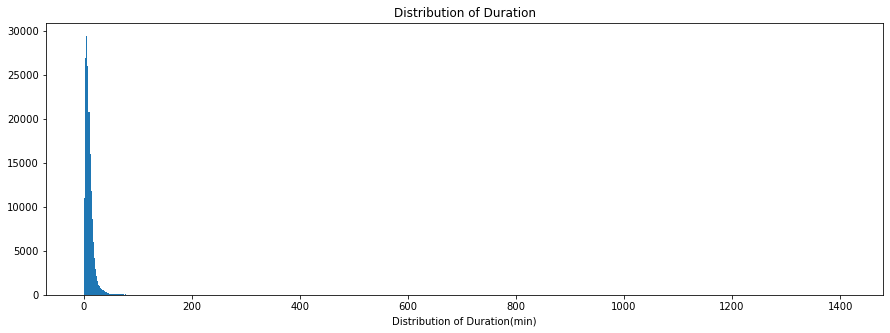

In [27]:
# starting with a standard scaled-histogram plot
def durationstandardscale():
    sol_string = ["I've used a Standard scaled histogram plot to show the distribution of trip duration.",
                  " As can be seen, the variable has a lot of data points, about 426 which cannot be captured using a standard plot",
                      "Using a standard scaled plot does not provide enough details about this distribution. It needs to be plotted on a scale that'll show clearer",
                  "and more interesting details."]
                      
    print((" ").join(sol_string))
    
    binsize = 2
    bins = np.arange(1, biketrip['duration'].max()+binsize, binsize)
    plt.figure(figsize=[15, 5])
    plt.hist(data = biketrip, x = 'duration', bins = bins)
    plt.xlabel('Distribution of Duration(min)')
    plt.title('Distribution of Duration')
    plt.show()
    
durationstandardscale()

I've used a histogram to show the distribution of trip duration on a log scale to visualize more and clearer information My plot has a long tail in the distribution and is right skewed and unimodal with highest frequency at 5mins and peak region between 4 and 10mins From the plot, it is clear that the fastest trips were completed between 4 and 10mins


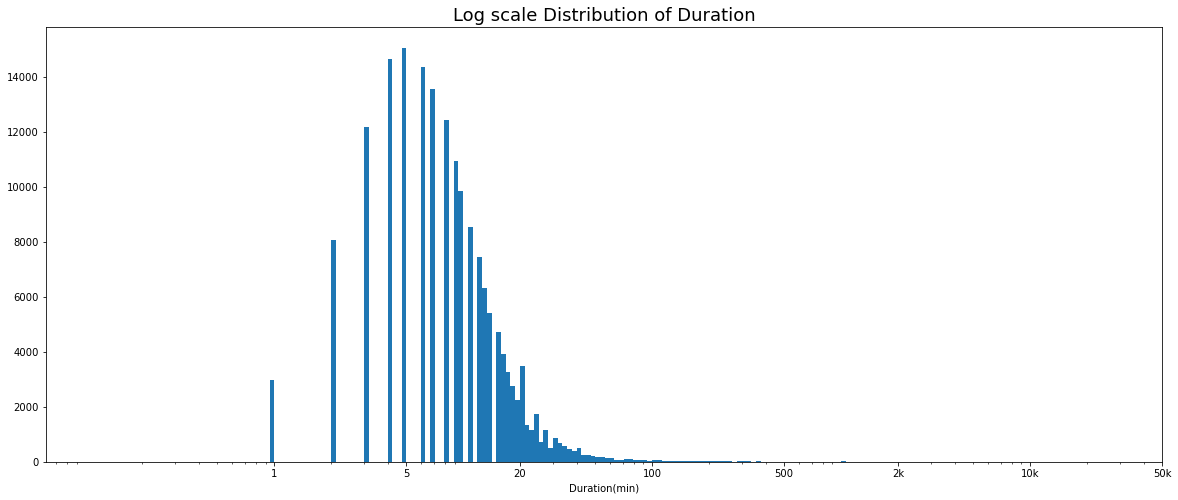

In [24]:
# there's a long tail in the distribution, so i'll put it on a log scale instead
def logduration():
    sol_string = ["I've used a histogram to show the distribution of trip duration on a log scale to visualize more and clearer information",
                      "My plot has a long tail in the distribution and is right skewed and unimodal with highest frequency at 5mins and peak region between 4 and 10mins", 
               "From the plot, it is clear that the fastest trips were completed between 4 and 10mins"]
                      
    print((" ").join(sol_string))
    log_binsize = 0.025
    bins = 10 ** np.arange(-1, np.log10(biketrip['duration'].max())+log_binsize, log_binsize)

    plt.figure(figsize=[20, 8])
    plt.hist(data = biketrip, x = 'duration', bins = bins)
    plt.xscale('log')
    plt.xticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k','10k','50k'])
    plt.xlabel('Duration(min)')
    plt.title('Log scale Distribution of Duration', fontsize=18)
    plt.show()
    
logduration()

### Observation
I've used a histogram to show the distribution of trip duration on a log scale to visualize more and clearer information. My plot has a long tail in the distribution and is right skewed and unimodal with highest frequency at 5mins and peak region between 4 and 10mins. This implies that the fastest trips were completed between 4 and 10mins with 5mins as its highest frequency.

Next is the distribution for my first predictor variable, members age:m_age

I've used a histogram to show the distribution of ages of members. My plot is unimodal and right skewed and it shows the most members between the ages of 29 and 45, The most members are 34 years of age. I'll plot this on a log scale for more details


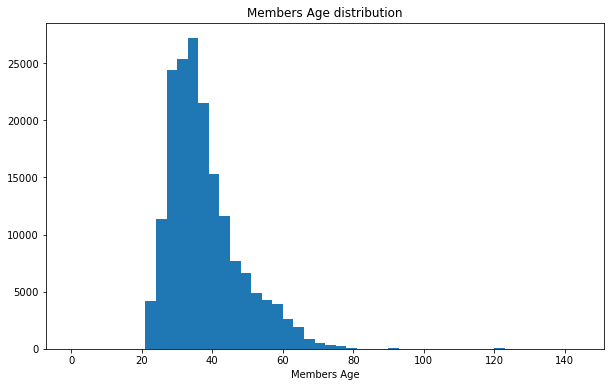

In [28]:
# using a standard-scaled plot
def memberage():
    sol_string = ["I've used a histogram to show the distribution of ages of members.",
                      "My plot is unimodal and right skewed and it shows the most members between the " 
                  "ages of 29 and 45, The most members are 34 years of age. I'll plot this on a log scale for more details"]
                      
    print((" ").join(sol_string))
    
    binsize = 3
    bins = np.arange(0, biketrip['m_age'].max()+binsize, binsize)
    plt.figure(figsize=[10, 6])
    plt.hist(data = biketrip, x = 'm_age', bins = bins)
    plt.xlabel('Members Age')
    plt.title('Members Age distribution')
    plt.show()
memberage()
    

On a log scale, my plot is still unimodal and right skewed with peak at 34 years of age


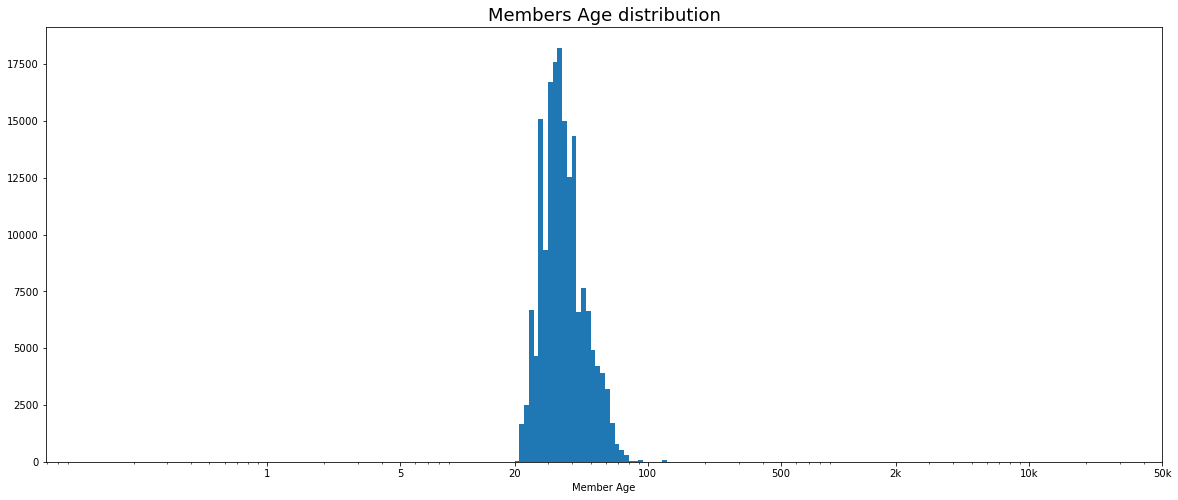

In [29]:
# there's a long tail in the distribution, so i'll put it on a log scale instead
def memberage():
    sol_string = ["On a log scale, my plot is still unimodal and right skewed with peak at 34 years of age"]
    print((" ").join(sol_string))
    log_binsize = 0.025
    bins = 10 ** np.arange(-1, np.log10(biketrip['m_age'].max())+log_binsize, log_binsize)

    plt.figure(figsize=[20, 8])
    plt.hist(data = biketrip, x = 'm_age', bins = bins)
    plt.xscale('log')
    plt.xticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    plt.xlabel('Member Age')
    plt.title('Members Age distribution', fontsize=18)
    
    plt.show()
    
memberage()

### Observation
>** Member Age comment: My histogram shows that the most members are between the ages of 29-45, with 10,214 members at age 34

Next up is the distribution of my second predictor variable: user_type

I've used matplotlib to plot a pie chart to depict the relative frequency between the 2 user types. My pie chart shows that Subsribers make the greater percentage of riders


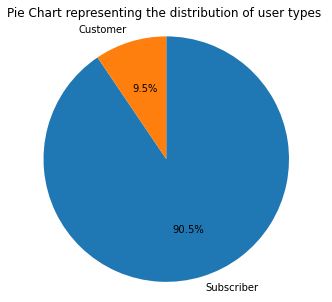

In [30]:
def usertype():
    sol_string = ["I've used matplotlib to plot a pie chart to depict the relative frequency between the 2 user types.",
                      "My pie chart shows that Subsribers make the greater percentage of riders"]
                      
    print((" ").join(sol_string))
    plt.figure(figsize=[8,5])
    sorted_counts = biketrip['user_type'].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.1f%%', counterclock = False);
    plt.axis('square')
    plt.title('Pie Chart representing the distribution of user types ')
usertype()

### Observation
>**User type comment: The pie chart clearly shows a huge gap between the number of subscribers(registered members) taking trips and the number of customers, implying that about 89.2% (158,386) members are subscibers as compared to 10.8%(16,566) who are customers. This implies that subscribers to Ford Go bike membership are more likely to take more bike trips

Next up is the distribution of my third predictor variable, members gender: m_gender

I've used matplotlib's donot plot to depict the relative frequency of the gender of the members. My donot shows that Male members are the majority


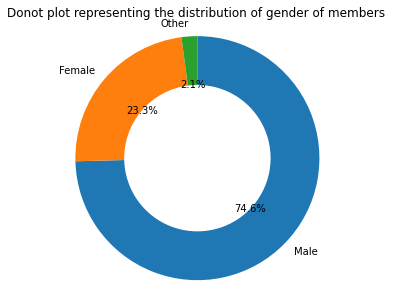

In [32]:
# plotting m_gender using a donot plot
def membergender():
    sol_string = ["I've used matplotlib's donot plot to depict the relative frequency of the gender of the members.",
                      "My donot shows that Male members are the majority"]
                      
    print((" ").join(sol_string))
    plt.figure(figsize = [8,5]) 
    sorted_counts = biketrip['m_gender'].value_counts()
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,autopct='%1.1f%%',counterclock = False, wedgeprops = {'width' : 0.4});
    plt.axis('square');
    plt.title('Donot plot representing the distribution of gender of members ')
membergender()

### Observation
>** Member gender comment: The donot plot clearly shows that there are more Male members than female or any other gender. Specifically, i have shown that about 74.6%(13,0500) of the members are males, 23.3%(40,805) are Females, while 2.1% (3647) represent other gender.

Next up is the distribution of the 4th predictor variable, the start & end time/hour of the day :start_hr, end_hr. I will be plotting them together since they have similar properties

I've used matplotlib hist function to ascertain the hour of the day that had the most trips happened My plot looks almost symmetric and is also bimodal Its highest peak is at the 17th hour and the 8th hour 


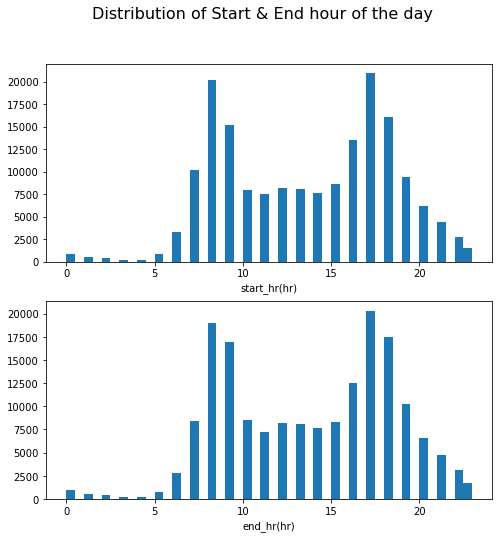

In [33]:
# using a standard-scaled plot
def triphour():
    sol_string = ["I've used matplotlib hist function to ascertain the hour of the day that had the most trips happened",
                          "My plot looks almost symmetric and is also bimodal",
                          "Its highest peak is at the 17th hour and the 8th hour "]
    print((" ").join(sol_string))
    fig, ax=plt.subplots(nrows=2, figsize=[8,8])

    variables=['start_hr','end_hr']
    for i in range(len(variables)):
        var =variables[i]
        bins = np.arange(min(biketrip[var]), max(biketrip[var])+0.5, 0.5)
        ax[i].hist(data=biketrip, x=var,bins = bins)
        ax[i].set_xlabel('{}(hr)'.format(var))


    plt.suptitle('Distribution of Start & End hour of the day', fontsize=16)
    plt.show()

triphour()

### Observation
>** Start & End hour of the day Distribution comment: The histogram shows that start & end hour of day have exactly the same distribution which is almost symmetric distribution and is also bimodal with one peak at 17th hour and the second peak at the 8th hour of the day. This also implies that the hour for which a trip starts is the same hour for which it ends
It is clear that the 17th hour of the day is the hour where the most trips took place with about 21,864 trips, closely followed by the 8th hour at 20,904 trips and the 8th hour at 20,227 trips. 
> It doesn't really make sense to me that the same hour of the day with the highest frequency for when a trip starts is the same hour of the day with the highest frequency for when trips end. This could imply that trips go on for 24 hours and beyond. 
> This informs that the distribution of this variable alone is not sufficient to draw any significant conclusions and so i will be exploring this variable one more time in the bivariate section to see if i could make some sense out of this distribution in correlation with other variables 


Next up is the distribution of my 5th predictor variable, the start day of the week and end day of the week. Since they both have the same ordering, i will plot them together : start_weekday, end_weekday

In [36]:
# converting start_weekday and end_weeday from a plain object type into an ordered categorical type.

weekdays=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
wday=pd.api.types.CategoricalDtype(ordered=True,categories=weekdays)
biketrip['start_weekday']=biketrip['start_weekday'].astype(wday);
biketrip['end_weekday']=biketrip['end_weekday'].astype(wday);

I've used pandas .astype() to convert the start_weekday and end_weekday variables  from a plain object type into an ordered categorical type. My bar chart shows the highest frequency for Thursday and lowest for Saturday


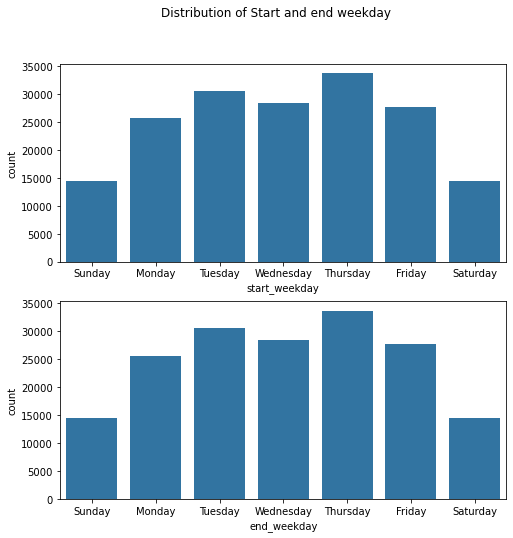

In [38]:
def weekday():
    sol_string = ["I've used pandas .astype() to convert the start_weekday and end_weekday variables ",
                  "from a plain object type into an ordered categorical type. My bar chart shows the highest frequency", 
                  "for Thursday and lowest for Saturday"]
    print((" ").join(sol_string))
    fig, ax=plt.subplots(nrows=2, figsize=[8,8])
  
    base_color = sb.color_palette()[0]
    sb.countplot(data = biketrip, x = 'start_weekday', color = base_color, ax=ax[0])
    sb.countplot(data = biketrip, x = 'end_weekday', color = base_color, ax=ax[1])
    plt.suptitle('Distribution of Start and end weekday')
    plt.show()
weekday()

### Observation
> Start & End weekday comment: The bar chart for the weekday variables the same distribution for start_weekday and end_weekday. Implying that the same weekday a trip starts is the same weekday a trip is likely to end. Thursday is shown with the highest frequency and Saturday with the lowest frequency. Implying that the most trips( 33,712 trips) started and ended on a Thursday followed by Tuesday with 30,584 trips and the least bike trips happened on a Saturday  with 14,414 which almost tied with Sunday. 
> Again, It doesn't still make sense to me that the same day of the week with the highest frequency for when a trip starts is the day of the week with the highest frequency for when trips end. This could imply that trips go on for 7 days and beyond. 
> This informs that the distribution of this variable alone is not sufficient to draw any significant conclusions and so i will be exploring this variable one more time in the bivariate section to see if i could make some sense out of this distribution in correlation with other variables 


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>The duration variable took on a large range of values, so I looked at the data using a log transform. With the log scaled transformation, the data is right skewed and unimodal, with highest frequency at 5mins.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the process of investigating the m_gender, m_age, start_hr, start_weekday and user_type variables, i encountered some unusual distributions with start and end hour of the day and start and end day of the week. The distribution of these variables alone are independently not sufficient to draw any significant conclusions and so i will be exploring these variable one more time in the bivariate section to see if i could make some sense out of this distribution in correlation with other variables.
> I performed a log scale transformation on m_age to capture more details. I also performed a dynamic ordering of bars for the start_weekday variable to enhance interpretability and better visuals.
> members age is right skewed and unimodal
> The slices of the m_gender and user_type variables are easy to differentiate using the donot and pie plot respectively
> start hour of the day is almost symmetric and bimodal.


## Bivariate Exploration

> I'll proceed with this by exploring the pairwise correlations present between features already investigated during my univariate exploration

In [ ]:
numeric_vars=['duration','m_age','start_hr','end_hr']
categoric_vars=['m_gender','user_type','start_weekday','end_weekday']

In [ ]:
# correlation plot of numeric variables
sol_string = ["As part of my exploration, i have created a correlation matrix using a heat map so i can easily",                
                              "visualize the strength of my relationships.This heatmap shows the relationship between my numeric variables"]
print((" ").join(sol_string))
plt.figure(figsize = [8, 5])
sb.heatmap(biketrip[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.suptitle('Heatmap showing correlation coefficients of numeric variables')
plt.show()

In [ ]:
# plot matrix of numeric variables: sample 2000 entries to make it render faster and clearer
sol_string = ["Plot matrix of numeric variables with histograms on the diagonals and scatter plot off the diagonals.",
             "I sampled 2000 entries to make it render clearer and faster"]                
print((" ").join(sol_string))
samples = np.random.choice(biketrip.shape[0], 2000, replace = False)
biketrip_s = biketrip.iloc[samples,:]

g = sb.PairGrid(data = biketrip_s, vars = ['duration','m_age','start_hr','end_hr'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

plt.suptitle('Plot matrix of numeric variables(2000 samples)', fontsize=18);

#### Observation:
> From the correlation coefficients and the plot matrix i observed the following-
> As expected, the start_hr and end_hr variables are highly correlated with each other since they have the same data. However, the start and end hour seem like they have correlation with the duration variable indicated by their almost linear plot and correlation coefficient. They do not seem to have a significant correlation with age variable.
> There is also an almost linear relationship between the duration and the age variables indicating that there is a strong correlation between them.
>These interactions are worth exploring further using the full dataset

<Figure size 1080x576 with 0 Axes>

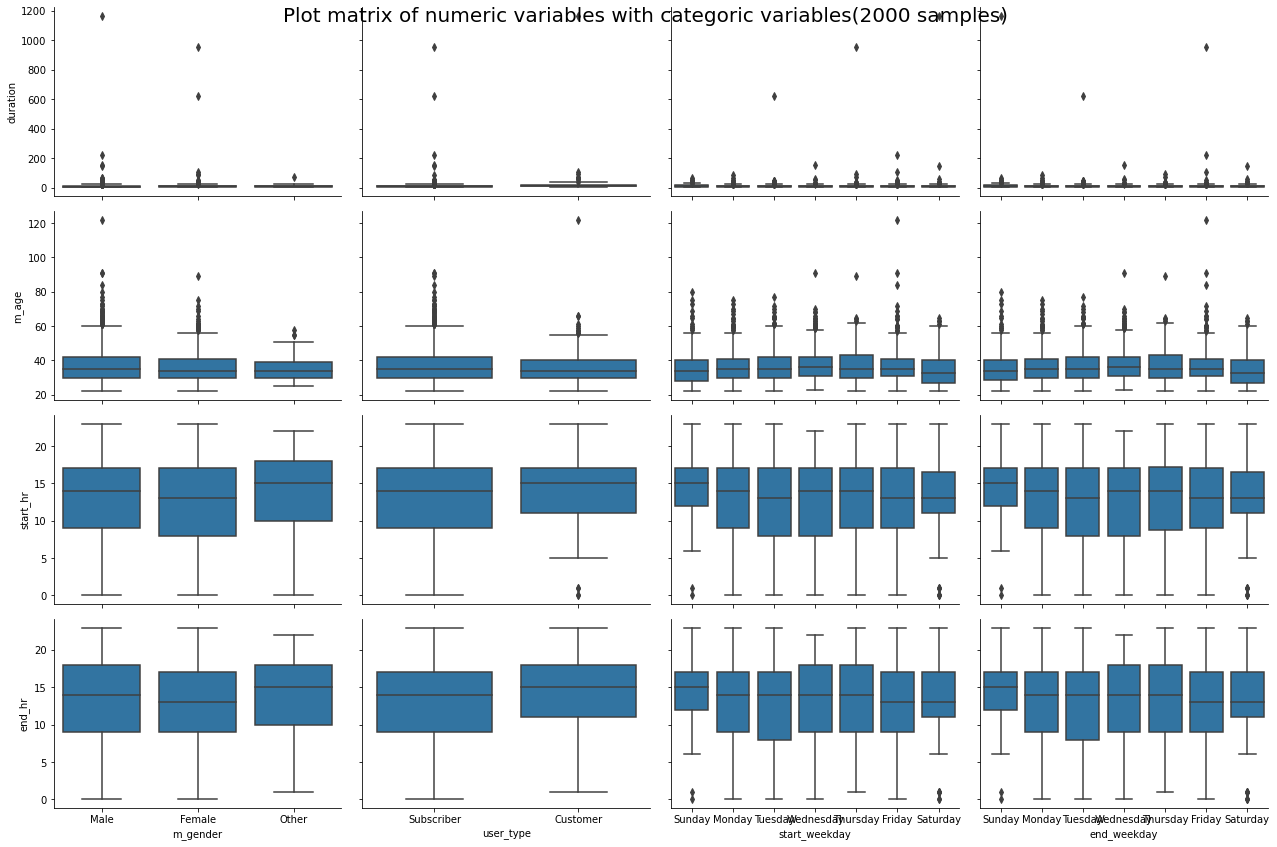

In [39]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(biketrip.shape[0], 2000, replace = False)
biketrip_s = biketrip.iloc[samples,:]

def boxgrid(x,y, **kwargs):
   
    default_color = sb.color_palette()[0]
    sb.boxplot(x,y, color=default_color)
plt.figure(figsize = [15, 8])
g = sb.PairGrid(data = biketrip_s, y_vars = ['duration','m_age','start_hr','end_hr'], 
                x_vars = ['m_gender','user_type','start_weekday','end_weekday'], height = 3, aspect = 1.5)
g.map(boxgrid)
plt.suptitle('Plot matrix of numeric variables with categoric variables(2000 samples)', fontsize= 20);
plt.show()

> Observation: As seen from my plot matrix, there is a strong relationship between age and duration numeric variables and some of the categoric variables like user type and gender. This can be seen as the categorical features with the most trips like Male gender, Subscriber usertype have the least duration and fall into the age group with the highest frequency. However, It is worthy of note that the numeric variables start hour of the day and end hour of the day do not have a significant correlation with the categoric variables.
>These interactions are worth exploring further using the full dataset


Next i'll explore the relationship between the categorical variables using a clustered bar chart

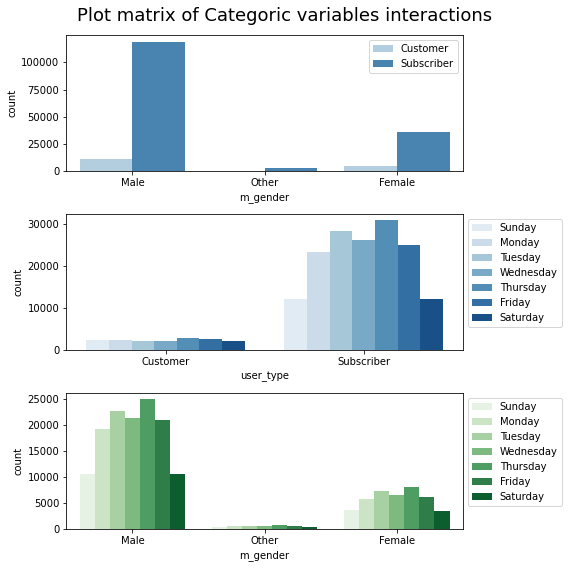

In [40]:
plt.figure(figsize = [8, 8])

# subplot 1: gender vs user type
plt.subplot(3, 1, 1)
sb.countplot(data = biketrip, x = 'm_gender', hue = 'user_type', palette = 'Blues')
plt.legend(bbox_to_anchor=(1,1.0))

# subplot 2: usertype vs start weekday
ax = plt.subplot(3, 1, 2)
sb.countplot(data = biketrip, x = 'user_type', hue = 'start_weekday', palette = 'Blues')
ax.legend(bbox_to_anchor=(1,1.0))

# subplot 3: gender vs start weekday
ax = plt.subplot(3, 1, 3)
sb.countplot(data = biketrip, x = 'm_gender', hue = 'start_weekday', palette = 'Greens')
ax.legend(bbox_to_anchor=(1,1.0))

plt.suptitle('Plot matrix of Categoric variables interactions', fontsize=18)
plt.tight_layout()
plt.show()

>There seems to be very good interaction between the gender and the user type. However, there doesn't seem to be any significant relationship between user type and start weekday and gender and start weekday as their plots do not show consistent results as the day with the highest frequency in previous plots was seen to be Thursday but indicates Friday for this relationship.

>**This brings me to the end of my preliminary exploration of bivariate relationships. I will now delve deeper to exploring some of these relationships.**

### Question 1: Is member age associated with duration of trip?
I'll explore this using m_age and duration variables

The interaction between age and duration has a lot of overlapping points which makes it difficult to see the actual relationship between the plotted variables. The points with the darker shades indicate more data points and of course higher counts. I have employed transparency  and jitter to make my plot more informative and make the strength of this relationship more clear.


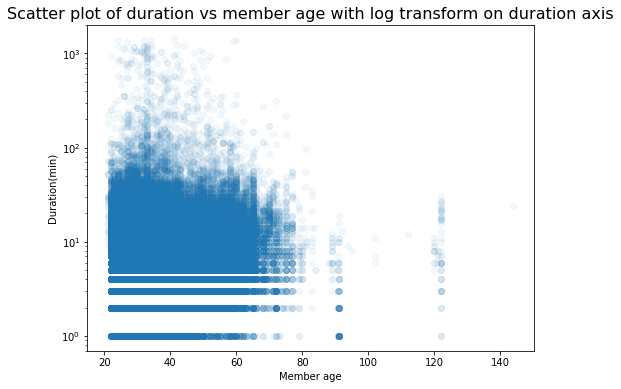

In [46]:
def agevsduration():
    
    sol_string = ["The interaction between age and duration has a lot of overlapping points which makes it difficult to",
                  "see the actual relationship between the plotted variables. The points with the darker shades indicate", 
                  "more data points and of course higher counts. I have employed transparency ",
                  "and jitter to make my plot more informative and make the strength of this relationship more clear."]                      
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])

    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k','10k','50k'])
    sb.regplot(data = biketrip, x = 'm_age', y = 'duration', x_jitter=0.04, scatter_kws={'alpha':1/20}, fit_reg=False)
    plt.yscale('log')
    plt.xlabel('Member age')
    plt.ylabel('Duration(min)');
    plt.title('Scatter plot of duration vs member age with log transform on duration axis', fontsize=16)
    plt.show()
agevsduration()


The interaction between age and duration has a lot of overlapping points which makes it difficult to see the actual relationship between the plotted variables. The points with the darker shades indicate more data points and of course higher counts. I have employed transparency and jitter to make my plot more informative and make the strength of this relationship more clear

In [ ]:
To zoom in more into this interaction and visualize a clearer perspective, i will make use of a heatmap

My heatmap gives a more informative perspective. The cells with the yellow and bright color have higher counts while the cells with the darker and purple color have lower counts


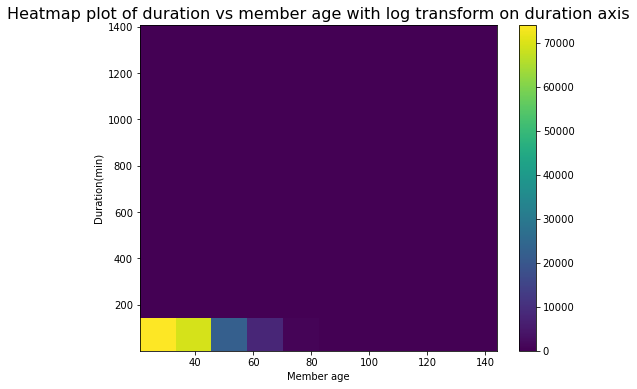

In [47]:
# Since the points are enormous,and both variables are discrete, i will plot using a heatmap 
def agevsduration():
    
    sol_string = ["My heatmap gives a more informative perspective. The cells with the yellow and bright color have higher",
                  "counts while the cells with the darker and purple color have lower counts"]                      
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])

    plt.hist2d(data = biketrip, x = 'm_age', y = 'duration')
    plt.colorbar()
    plt.xlabel('Member age')
    plt.ylabel('Duration(min)');
    plt.title('Heatmap plot of duration vs member age with log transform on duration axis', fontsize=16)
    plt.show()
agevsduration()

#### Observation
> My heatmap gives a more informative perspective. The cells with the yellow and bright color have higher counts while the cells with the darker and purple color have lower counts. It is clear from both plots that members between the ages of 20 & 40 are more likely to complete trips in shorter times

### Question 2: Is member gender associated with duration of trip?
I'll explore this using m_gender and duration variables

In [ ]:
def gendervsduration():
    
    sol_string = ["I chose a boxplot for this visualization so i can have a cleaner summary statistics and focus on the details.",
                  "It is clear from the plot that the Male gender corresponds with the duration with the most frequency",
                  " at 5mins represented by the first quartile(Q1). This implies thatthe Male gender are more likely",
                  " to complete their trip in a shorter time"]
                      
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])
    base_color = sb.color_palette()[0]
    sb.boxplot(data = biketrip, x = 'm_gender', y = 'duration', color = base_color)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    plt.ylabel('Duration (min)')
    plt.title('Violin plot of duration vs member gender with log transform on duration axis', fontsize=16)
    plt.show()
gendervsduration()

#### Observation: 
> I chose a boxplot for this visualization so i can have a cleaner summary statistics and focus on the details. It is clear from the plot that the Male gender correlates with the duration with the most frequency at 5mins represented by the first quartile(Q1). This implies thatthe Male gender are more likely to complete their trip in a shorter time. 

### Question 3: Is Start hour of trip associated with duration of trip?
I'll explore this using start_hr and duration variables

In [ ]:
# using matplotlib scatter function 
def starthourvsduration():
    
    sol_string = ["My Scatter plot doesn't show any significant correlation between start hour and duration of trip"]
                                     
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])

    plt.scatter(data = biketrip, x = 'start_hr', y = 'duration', alpha = 1/10)

    plt.xlabel('Start hour of the day')
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    plt.ylabel('Duration (min)')
    plt.title('Scatter plot of duration vs Start hour with log transform on duration axis', fontsize=16)
    plt.show()
starthourvsduration()

#### Observation
> From the scatter plot, there doesn't seem to be any significant correlation between start hour of the day and duration of trip. We will not be exploring the variable start_hr any further for this project

### Question 4: Does Usertype influence the duration of trip?
I'll explore this using user type and duration variables

In [ ]:
def usertypevsduration():
    
    sol_string = ["My boxplot is plotted with a log transform on duration axiss."
                  " It clearly shows a strong correlation between user type and trip duration"]
                                     
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])
    base_color = sb.color_palette()[0]
    sb.boxplot(data = biketrip, x = 'user_type', y = 'duration', color = base_color)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    plt.ylabel('Duration (min)')
    plt.title('Violin plot of duration vs User type with log transform on duration axis', fontsize=16)
    plt.show()
usertypevsduration()

#### Observation
> My boxplot is plotted with a log transform on duration axis. It clearly shows a strong correlation between user type and trip duration. Subscribers complete trips in the fastest time

#### Question 5: Is Start day of the week associated with the duration of trip?
I'll explore this using start_weekday and duration variables

My violinplot is plotted with a log transform on duration axiss.There doesn't seem to be any significant correlation between start weekday and duration


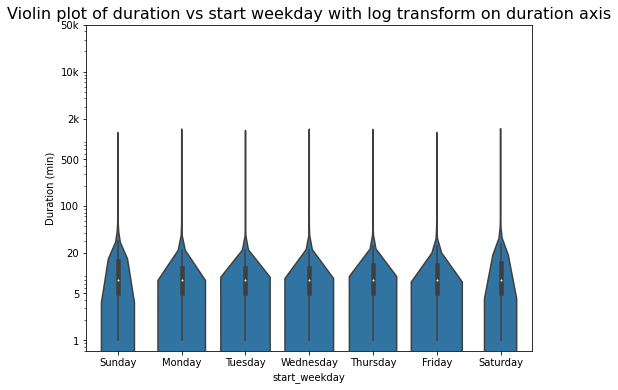

In [41]:
def startweekdayvsduration():
    
    sol_string = ["My violinplot is plotted with a log transform on duration axiss."
                  "There doesn't seem to be any significant correlation between start weekday and duration"]
                                     
    print((" ").join(sol_string))
    plt.figure(figsize = [8, 6])
    base_color = sb.color_palette()[0]
    sb.violinplot(data = biketrip, x = 'start_weekday', y = 'duration', color = base_color)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    plt.ylabel('Duration (min)')
    plt.title('Violin plot of duration vs start weekday with log transform on duration axis', fontsize=16)
    plt.show()
    
startweekdayvsduration()

#### Observation
> My violinplot is plotted with a log transform on duration axis. There doesn't seem to be any significant correlation between start weekday and duration. We will not be exploring the start weekday variable any further in this project.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My exploration so far indicates that Duration has a good correlation with member age,usertype and member gender in order of decreasing correlation.
> There doesn't seem to be any significant correlation between duration and the start and end hour and also the start and end day of the week. So i won't be exploring them any further. 
> On plotting duration against age on a log scale, the scatter plot and heatmaps both depicted an almost linear relationship between these two variables.It makes sense that younger members between ages 20 and 45 take shorter times to complete trips. 
> It also makes sense that Subscribers to the Ford Go Bike system would take a shorter time to complete trips and also that the Male gender are more likely to complete trips faster.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> Numeric variables relationship: As expected, the start_hr and end_hr numeric variables are highly correlated with each other since they have the same data. However, they are not correlated with other numeric variables. 
> Numeric vs Categric variables relationship: It is worthy of note that the numeric variables start hour of the day and end hour of the day do not have a significant correlation with the categoric variables
> Categoric variables relationship: There seems to be very good interaction between the gender and the user type. However, there doesn't seem to be any significant relationship between user type and start weekday and gender and start weekday as their plots do not show consistent results 


## Multivariate Exploration

> In this section, i will be exploring the relationship between 3 of my variables that have shown the strongest correlation. I will be exploring how the combination of 2 of my predictor variables influence my dependent variable(variable of interest-duration). Two groups of relationship will be explored here-
- duration vs age vs usertype
- duration vs age vs gender

### Question 6: Does it take a subscriber who is between the ages of 20 and 45 a shorter time to complete trips?

In [ ]:
biketrip.value_counts(['duration','m_age','user_type'])

In [ ]:
def durationvsagevsusertype():
    sol_string = ["I used a non positional encoding 'color' to represent my 3rd variable- usertype. From my plot it is", 
                  "clear that the data points for the subscriber user which is encoded using a thicker shade of blue is ",
                  "consistently lined around the shortest duration which is btw 5-10 mins"]
                                     
    print((" ").join(sol_string))
    fig = plt.figure(figsize = [15,8])
    ax = sb.pointplot(data = biketrip, x = 'm_age', y = 'duration', hue = 'user_type',
               palette = 'Blues', linestyles = '', dodge = 0.4)
    plt.title('Duration across age and user type', fontsize=18)
    plt.ylabel('Duration(min)', fontsize=12)
    plt.xlabel('Member age', fontsize=12)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,  2e3, 1e4, 5e4], [1,5,20,100, 500, '2k',  '10k', '50k'])
    ax.set_yticklabels([],minor = True)
    plt.xticks(rotation=15,fontsize=8)
    plt.show();
    
durationvsagevsusertype()

### Observation
>I used a non positional encoding - color to represent my 3rd variable- usertype. From my plot it is clear that the data points for the subscriber user which is encoded using a thicker shade of blue is consistently lined around the shortest duration which is btw 5-10 mins
> From my plot it is clear that the data points for the subscriber user is consistently lined around the shortest duration which is btw 5-10 mins. This implies that subscribers between ages of 20 and 45 had the shortest duration of trip, they completed their trips faster. Thus, age and usertype together are a strong combination to predicting how fast a trip can be completed.

### Question 7: Can we conclude that Males between the ages of 20 and 45 are more likely to complete trips in shorter time?

In [ ]:
biketrip.value_counts(['duration','m_age','m_gender'])

In [ ]:
def durationvsagevsgender():
    sol_string = ["I used a non positional encoding 'color' to represent my 3rd variable- gender.", 
                   "From my plot it is clear that the data points for the male gender which is encoded", 
                   "using a light shade of blue is consistently lined around the shortest duration which is btw 5-10 mins"]                 
    print((" ").join(sol_string))
    
    fig = plt.figure(figsize = [15,8])
    ax = sb.pointplot(data = biketrip, x = 'm_age', y = 'duration', hue = 'm_gender',
               palette = 'Blues', linestyles = '', dodge = 0.4)
    plt.title('Duration across age and gender', fontsize=18)
    plt.ylabel('Duration(min)', fontsize=12)
    plt.xlabel('Member age', fontsize=12)
    plt.yscale('log')
    plt.yticks([1,5,20,100,500,2e3,1e4,5e4], [1,5,20,100,500,'2k','10k','50k'])
    ax.set_yticklabels([],minor = True)
    plt.xticks(rotation=15,fontsize=8)
    plt.show();
    
durationvsagevsgender()

## Observation
> I used a non positional encoding -color to represent my 3rd variable- gender. 
> From my plot it is clear that the data points for the male gender which is encoded using a light shade of blue is consistently lined around the shortest duration which is btw 5-10 mins.
> So we can conclude that the Males between the ages of 20 and 45 are more likely to complete their trips in the shortest time
                                     

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The bivariate relationships- duration vs age and duration vs usertype were strengthened by the trio combination as seen in my multivariate plot. The combination of age and usertype are great for predicting how fast or slow a trip can be completed in.
In the same vein, the bivariate relationships- duration vs gender was strengthened by the addition of age to the combination as seen in my multivariate plot. The combination of age and gender are also great for predicting how fast or slow a trip can be completed in.

### Were there any interesting or surprising interactions between features?

One Interaction i found interesting is the interactions between the  age, usertype and the duration of trip features. **Subscribers between ages of 20 and 45 have the shortest duration of trip, they complete their trips faster. Thus, age and usertype together are a strong combination to predicting how fast a trip can be completed.**

## Conclusions

The Ford GoBike dataset used in this project originally contained about 184,000 individual bike ride entries with 16 features. After some preliminary wrangling was carried out on it to prepare the data for visualization, 174,952 entries with 15 features were used for the visualization. The focus of this project was to determine the factors that influence the duration of a trip which i chosed as my dependent variable. 5 independent/predictor variables(member age, member gender, usertype, start hour and start weekday) were chosen to answer this question and they were analyzed as univariate, bivariate and multivariate interactions.

The following questions were asked in the course of the project analysis

- Is member age associated with duration of trip?
- Is member gender associated with duration of trip?
- Is Start hour of trip associated with duration of trip?
- Does Usertype influence the duration of trip?
- Is Start day of the week associated with the duration of trip?
- Does it take a subscriber who is between the ages of 20 and 45 a shorter time to complete trips?
- Can we conclude that Males between the ages of 20 and 45 are more likely to complete trips in shorter time?

The following answers were given to the questions respectively-

- Yes, Age of members is associated with duration of trip. Specifically, 903 members of age 34 completed trips in 6mins
- Yes, the gender is associated with the duration of trip, The male gender are more likely to complete trips faster. 11,574 Males completed trips in 5 mins
- No, There is no significant association between start hour of the day and duration of a trip
- Yes, Usertype influences the duration of a trip. Subsribers are more likely to complete trips faster. 14,274 suscribers completed trips in 5 mins
- No, There is no significant association between start day of week and duration of a trip
- Subscribers between ages of 20 and 45 had the shortest duration of trip, they completed their trips faster. 859 subscribers at 34 years completed trips in 6 mins
- We can conclude that the Males between the ages of 20 and 45 are more likely to complete their trips in the shortest time. Specifically, 668 Male members at 29 years completed trips in 5 mins


Generally, we can answer the goal question which was to ascertain what factors determine the duration of a trip.
The factors include the following-
- Age of member
- User type of member
- Gender of member

***The End!

